In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [3]:
train = pd.read_csv("C:\\Users\\91775\\EXCEL FILES\\train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("C:\\Users\\91775\\EXCEL FILES\\test_Y3wMUE5_7gLdaTN.csv")

In [29]:
train.drop("Loan_ID", axis = 1, inplace = True) 

In [30]:
train["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [31]:
train.fillna(0, inplace = True)

In [32]:
train.dtypes 

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [33]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [34]:
train_encoded = pd.get_dummies(train, columns = ["Dependents", "Property_Area", "Gender", "Married", "Education", "Self_Employed"])
train_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_0,Dependents_1,Dependents_2,...,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,0.0,360.0,1.0,Y,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,N,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,6000,0.0,141.0,360.0,1.0,Y,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0


In [35]:
train_encoded.columns #to see list of column names

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Dependents_0',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Gender_0', 'Gender_Female', 'Gender_Male', 'Married_0', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_0', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [36]:
train_encoded.columns = train_encoded.columns.str.replace(" ", "_")
train_encoded.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Dependents_0',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Gender_0', 'Gender_Female', 'Gender_Male', 'Married_0', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not_Graduate',
       'Self_Employed_0', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [37]:
#Now, we see two equal column names: "Dependents_0", replace first one by "Dependents_00"
train_encoded.columns.values[6] = "Dependents_00"
train_encoded.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Dependents_00',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Gender_0', 'Gender_Female', 'Gender_Male', 'Married_0', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not_Graduate',
       'Self_Employed_0', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [38]:
features = train_encoded.drop("Loan_Status", axis = 1)
labels = train_encoded["Loan_Status"]

In [39]:
features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_00,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Education_Graduate,Education_Not_Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,0.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,6000,0.0,141.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [40]:
labels.replace("N", "0", inplace = True)
labels.replace("Y", "1", inplace = True)
labels = labels.astype(int)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels)

In [42]:
model = XGBClassifier(objective = "binary:logistic", missing = None)

In [43]:
model.fit(X_train, y_train, verbose = True,
         early_stopping_rounds = 10,
         eval_metric = "aucpr",
         eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.83350
[1]	validation_0-aucpr:0.82675
[2]	validation_0-aucpr:0.80462
[3]	validation_0-aucpr:0.80925
[4]	validation_0-aucpr:0.78964
[5]	validation_0-aucpr:0.81168
[6]	validation_0-aucpr:0.80058
[7]	validation_0-aucpr:0.79719
[8]	validation_0-aucpr:0.80137
[9]	validation_0-aucpr:0.80460
[10]	validation_0-aucpr:0.80742


G:\py\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
predictions = model.predict(X_test)

In [45]:
accuracy_score(predictions, y_test) #on the train dataset

0.6948051948051948

In [46]:
model2 = DecisionTreeClassifier() # testing for DecisionTreeClassifier
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
accuracy_score(predictions2, y_test)

0.6558441558441559

In [47]:
model3 = RandomForestClassifier() # testing for RandomForestClassifier
model3.fit(X_train, y_train)
predictions3 = model3.predict(X_test)
accuracy_score(predictions3, y_test)

0.7077922077922078

In [48]:
model4 = LogisticRegression() # tesing for LogisticRegression
model4.fit(X_train, y_train)
predictions4 = model4.predict(X_test)
accuracy_score(predictions4, y_test)

0.6623376623376623

In [8]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
 test = pd.read_csv("C:\\Users\\91775\\EXCEL FILES\\test_Y3wMUE5_7gLdaTN.csv")
ID = test["Loan_ID"]
test.drop("Loan_ID", axis = 1, inplace = True)
test.fillna(0, inplace = True)
test_encoded = pd.get_dummies(test, columns = ["Dependents", "Property_Area", "Gender", "Married", "Education", "Self_Employed"])
test_encoded.columns = test_encoded.columns.str.replace(" ", "_")
test_encoded.columns.values[5] = "Dependents_00"
test_encoded.insert(16, "Married_0", 0)
test_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_00,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Education_Graduate,Education_Not_Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes
0,5720,0,110.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
1,3076,1500,126.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
2,5000,1800,208.0,360.0,1.0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
3,2340,2546,100.0,360.0,0.0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
4,3276,0,78.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0


In [50]:
test_predictions = model.predict(test_encoded)
test_predictions = pd.DataFrame(test_predictions, columns = ["Loan_Status"])
test_predictions["Loan_ID"] = ID
test_predictions["Loan_Status"].replace(0, "N", inplace = True)
test_predictions["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions = test_predictions[["Loan_ID", "Loan_Status"]]
final_predictions.to_csv("C:\\Users\\Admin\\final_submission2.csv",index = False)
final_predictions.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N


In [51]:
https://www.kaggle.com/galymbek/loan-prediction

SyntaxError: invalid syntax (<ipython-input-51-d5088eb14e02>, line 1)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [53]:
train = pd.read_csv(r"C:\Users\Admin\loan perdiction\train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv(r"C:\\Users\\Admin\\loan perdiction\\test_Y3wMUE5_7gLdaTN.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
train.describe() #these are statics for numerical attributes

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
train.info() # there are 13 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [56]:
# in above example some dataes are in object type so we have to change coreesponding data type and catagorical to reduce
#memorary uses but here it only usages only 62.7kb so no need to change attributes data type( called data reduction)

## Preprocessing the dataset

In [57]:
#Checking null value
train.isnull().sum() #here total 7 attributes have null value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
# fill the missing value for numeric terms here by mean

In [59]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [60]:
# fill the missing value for categorical terms here by - mode(means most occuring term)

In [61]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [62]:
#reson behind mode()[0] beacuse mode gives output as dataframe so we use index vale and it will acces coresponding value
train['Gender'].mode().values[0]
train['Gender'].mode()[0]                # both are same 

'Male'

In [63]:
#check null value again
train.isnull().sum() #all null values are replaced

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

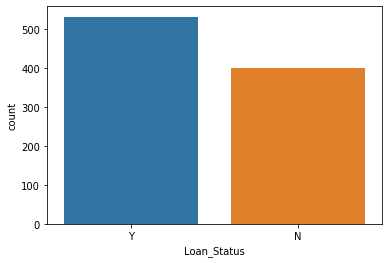

In [64]:
# Categorical Attributes visualisation 
attri = ('Gender','Married','Dependents','Education','Self_Employed','Loan_Status')

for i in attri:
    sns.countplot(train[i]) # here i hvae to use subplot so that i can show all plot

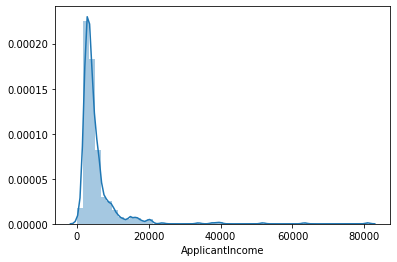

In [65]:
# Numerical atrributes visualisation(hitogram)
sns.distplot(train['ApplicantIncome'])
# plot/graph is left skewed so it is not a suitable distribution for training a model so we will use log function in column to 
#normalized attribues in bell curve 

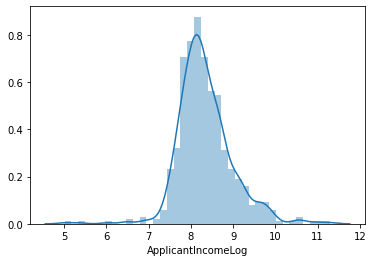

In [66]:
#apply log transformation to the attribute
train['ApplicantIncomeLog'] = np.log(train['ApplicantIncome'])
sns.distplot(train['ApplicantIncomeLog'])

# now it is  normalised so it is good for model training if we get lef/right skewed graph than use log,mean-max,standerisation
#to normalised the graph

G:\py\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
G:\py\lib\site-packages\seaborn\distributions.py:39: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: cannot convert float NaN to integer

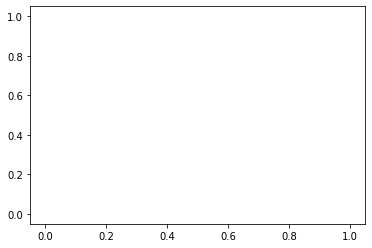

In [67]:
train['CoapplicantIncomeLog'] = np.log(train['CoapplicantIncome'])
sns.distplot(train['CoapplicantIncomeLog']) # here some income is zero so we can normalised using log

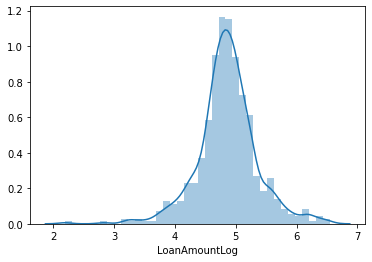

In [68]:
train['LoanAmountLog'] = np.log(train['LoanAmount'])
sns.distplot(train['LoanAmountLog'])

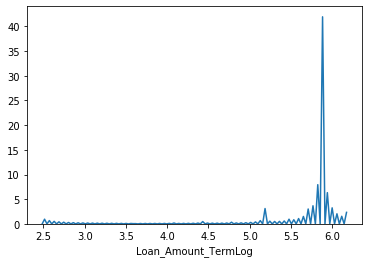

In [69]:
train['Loan_Amount_TermLog'] = np.log(train['Loan_Amount_Term'])
sns.distplot(train['Loan_Amount_TermLog'],hist = False) # here graph is right skewed after normalisation but on axies we can see difference are 
#less compare to without normalisation

In [70]:
#Creation of new attributs
# by adding income to total income 
train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104


In [71]:
#total income 
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.318540,4.852030,5.886104,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,-inf,4.189655,5.886104,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765569,4.787492,5.886104,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,-inf,4.948760,5.886104,6000.0


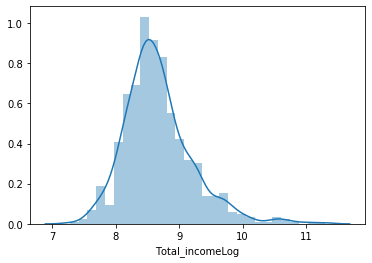

In [72]:
train['Total_incomeLog'] = np.log(train['Total_income'])
sns.distplot(train['Total_incomeLog'])

## Coorelation Matrix

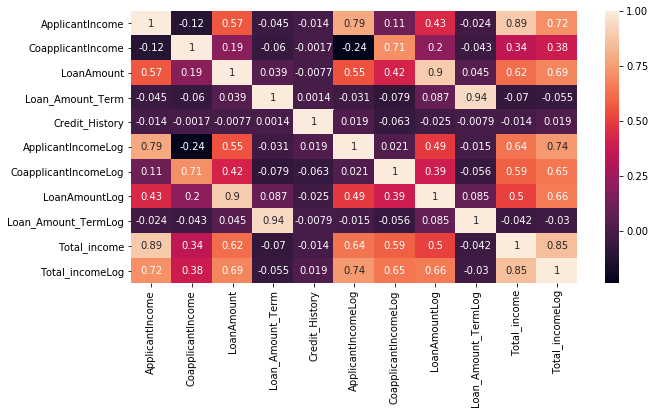

In [73]:
from matplotlib import pyplot as plt
corr = train.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr,annot = True)

In [74]:
train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_income,Total_incomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104,5849.0,8.674026


In [75]:
# drop unnecessary column 
cols = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','CoapplicantIncomeLog']
train = train.drop(columns = cols,axis = 1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_income,Total_incomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,5849.0,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,4941.0,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,6000.0,8.699515


# label encoding
# hot encoding


In [86]:
from sklearn import preprocessing
labl = preprocessing.LabelEncoder()
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
for col in cols:
    train[col] = labl.fit_transform(train[col])
     

In [87]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_income,Total_incomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,5849.0,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,6091.0,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,3000.0,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,4941.0,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,6000.0,8.699515


## Train test Split

In [88]:
# specify input and output attributes
X = train.drop(columns = ['Loan_Status'],axis = 1)
y = train['Loan_Status']

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42) #random_state is used to split 
#the data as asame maner at different time(when we run data later gives same test result) to avoid different result at 
#different time 


## Model Training

In [90]:
#classify function
from sklearn.model_selection import cross_val_score
def classify(model ,x,y):# x input attribute and y is out attributes
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)
    model.fit(x_train,y_train)
    print("Accuracy is",model.score(x_test,y_test)*100)# multiply 100 to show in percantage
    #cross validation - it is used for better validation of model(cross validation split data into multiple parts)
    #eg cv-5,means train set-4,test- 1
    score = cross_val_score(model,x,y,cv = 5)
    print("cross validation is, ",np.mean(score)*100)# we use cv = 5 so we will take average output

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is 64.93506493506493
cross validation is,  78.16073570571771


In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 70.77922077922078
cross validation is,  71.01426096228175


In [102]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()
classify(model,X,y)

Accuracy is 76.62337662337663
cross validation is,  78.18072770891644


In [104]:
from sklearn import ensemble
model = ensemble.ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 73.37662337662337
cross validation is,  76.55471144875384


In [105]:
#lets see how accuracy changes with hyperparameters


## Hyperparameter tunning

In [108]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(n_estimators = 100,min_samples_split = 25,max_depth = 7,max_features = 1)
classify(model,X,y)# parameter (or change bhi kr skte )are slected by alogrithm like  grith search and random search

Accuracy is 77.27272727272727
cross validation is,  79.80807676929228


## A confusion matrix is a summary of prediction result on a classification problem. The number of correct and incorrect predictions are summarised with count values and broken down by each class.it gives us insight not only into errors being made by a classifier but more importantly the types of errors that are being made.

In [110]:
model = ensemble.RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [112]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[25, 29],
       [ 7, 93]], dtype=int64)

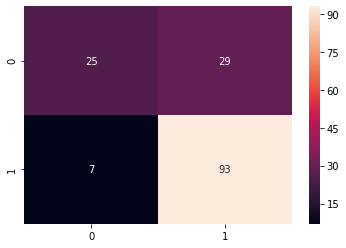

In [113]:
sns.heatmap(cm,annot = True)